# Task
Clean the data and extract new file and do EDA and visualization intelligently to derive insights from the given data

Here is all the data you need:
"train_1.csv"

## Data loading

### Subtask:
Load the data from "train_1.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from "train_1.csv" into a pandas DataFrame and display the first 5 rows and the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('train_1.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'train_1.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse 'train_1.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


(145063, 551)


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify missing values, data types, and potential outliers. Determine the shape of the data and the distribution of key variables.


**Reasoning**:
Examine the data types, missing values, descriptive statistics, distributions, and correlations to understand the data structure and identify potential issues.



Data Types:
 float64    550
object       1
Name: count, dtype: int64

Missing Values:
 Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

Missing Value Percentage:
 Page           0.000000
2015-07-01    14.297236
2015-07-02    14.349627
2015-07-03    14.162123
2015-07-04    14.237952
                ...    
2016-12-27     2.551305
2016-12-28     2.634717
2016-12-29     2.637475
2016-12-30     2.505808
2016-12-31     2.388617
Length: 551, dtype: float64


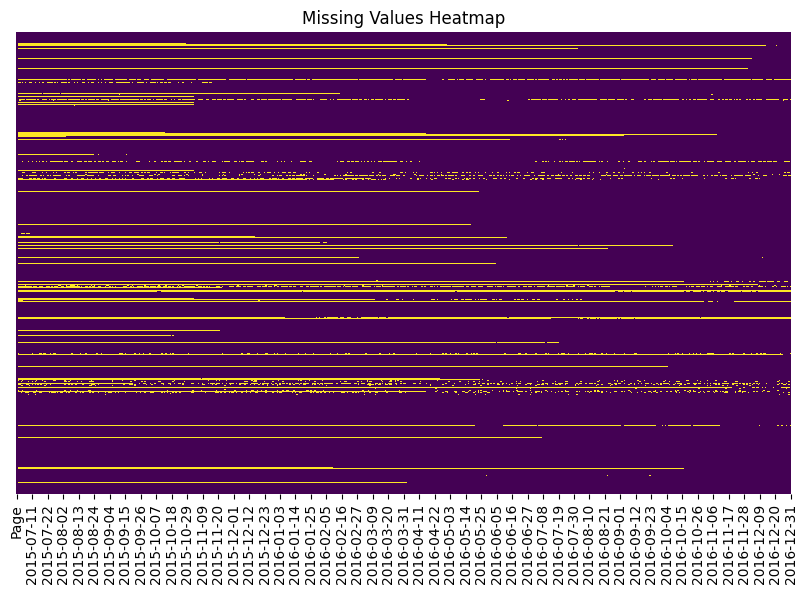


Descriptive Statistics:
          2015-07-01    2015-07-02    2015-07-03    2015-07-04    2015-07-05  \
count  1.243230e+05  1.242470e+05  1.245190e+05  1.244090e+05  1.244040e+05   
mean   1.195857e+03  1.204004e+03  1.133676e+03  1.170437e+03  1.217769e+03   
std    7.275352e+04  7.421515e+04  6.961022e+04  7.257351e+04  7.379612e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.300000e+01  1.300000e+01  1.200000e+01  1.300000e+01  1.400000e+01   
50%    1.090000e+02  1.080000e+02  1.050000e+02  1.050000e+02  1.130000e+02   
75%    5.240000e+02  5.190000e+02  5.040000e+02  4.870000e+02  5.400000e+02   
max    2.038124e+07  2.075219e+07  1.957397e+07  2.043964e+07  2.077211e+07   

         2015-07-06    2015-07-07    2015-07-08    2015-07-09    2015-07-10  \
count  1.245800e+05  1.243990e+05  1.247690e+05  1.248190e+05  1.247210e+05   
mean   1.290273e+03  1.239137e+03  1.193092e+03  1.197992e+03  1.189651e+03   
std    8.054448e+04  7.57

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print("Data Types:\n", df.dtypes.value_counts())

# 2. Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Visualize missing values (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# 3. Descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
descriptive_stats = df[numerical_cols].describe()
print("\nDescriptive Statistics:\n", descriptive_stats)

# 4. Distribution of key numerical variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols[:4]): # Analyze the first 4 numerical columns
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


# 5. Unique values and frequencies for the 'Page' column
print("\nUnique Values and Frequencies for 'Page':\n", df['Page'].value_counts().head(10))

# 6. Correlation between numerical variables (first 10 numerical columns)
correlation_matrix = df[numerical_cols[:10]].corr()  # Reduce the number of columns for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# 7. Summary Report
print("\nSummary Report:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("The dataset consists of website access data over time. The 'Page' column appears to identify the website.")
print("Missing values are present in several columns, as visualized by the heatmap. Further investigation is needed to determine the best handling strategy.")
print("Descriptive statistics reveal potential outliers in some numerical columns. These should be further examined.")
print("Histograms show the distribution of the first 4 numerical columns. Some appear to be skewed.")
print("The correlation matrix shows the relationships between the first 10 numerical columns.")